In [880]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import numpy as np
from sklearn import tree
import sklearn.linear_model as lm
from sklearn import preprocessing, model_selection, pipeline
from sklearn import metrics
from sklearn.inspection import permutation_importance



from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets



import sys
sys.path.append('C://Program Files//Graphviz//bin')



np.set_printoptions(precision=3)
pandas.set_option("display.precision", 3)


%matplotlib inline

In [881]:
np.set_printoptions(precision=3)
pandas.set_option("display.precision", 3)



classification_scores = ['accuracy','precision_weighted',
                         'recall_weighted', 'roc_auc_ovr_weighted',
                         'f1_weighted']

%matplotlib inline

<font size="6"><div align="center"><span style="color:blue">Leitura e entendimento da base</span></div></font>

In [882]:
df_churn = pandas.read_csv('churn.csv')
churn_target_col = 'churn_risk_score'
churn_label_map = df_churn[['churn_risk_score', 'churn_risk_score']].drop_duplicates()
#df_churn = df_churn.dropna()

In [883]:
drop_cols = ['churn_risk_score']
#df_churn.drop(drop_cols, axis=1, inplace=True)
df_churn.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [884]:
print(df_churn.shape)
count_nan_in_df = df_churn.isnull().sum()
print (count_nan_in_df)

(36992, 24)
Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


In [885]:
df_churn.dtypes

Unnamed: 0                        int64
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [886]:
df_churn['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [887]:
df_churn = df_churn[df_churn.gender != 'Unknown']

In [888]:
df_churn['region_category'].value_counts()


Town       14099
City       12721
Village     4693
Name: region_category, dtype: int64

In [889]:
df_churn = df_churn.dropna(subset=['region_category'])

In [890]:
df_churn['membership_category'].value_counts()

Basic Membership       6550
No Membership          6530
Gold Membership        5780
Silver Membership      5145
Premium Membership     3793
Platinum Membership    3715
Name: membership_category, dtype: int64

In [891]:
df_churn['joined_through_referral'].value_counts()

No     13528
Yes    13357
?       4628
Name: joined_through_referral, dtype: int64

In [892]:
df_churn["joined_through_referral"].replace({"?": "No"}, inplace=True)

In [893]:
df_churn['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       10515
Credit/Debit Card Offers    10462
Without Offers              10298
Name: preferred_offer_types, dtype: int64

In [894]:
df_churn = df_churn.dropna(subset=['preferred_offer_types'])

In [895]:
df_churn['medium_of_operation'].value_counts()

Smartphone    11837
Desktop       11708
?              4505
Both           3225
Name: medium_of_operation, dtype: int64

In [896]:
df_churn['internet_option'].value_counts()

Wi-Fi          10438
Mobile_Data    10429
Fiber_Optic    10408
Name: internet_option, dtype: int64

In [897]:
df_churn['last_visit_time'].value_counts()

07:56:41    5
21:12:56    5
10:02:56    4
04:40:35    4
14:29:12    4
           ..
04:43:06    1
22:06:47    1
12:30:55    1
17:49:17    1
01:39:52    1
Name: last_visit_time, Length: 26239, dtype: int64

In [898]:
df_churn['avg_frequency_login_days'].value_counts()

Error                  2975
13.0                   1176
8.0                    1153
14.0                   1152
19.0                   1141
                       ... 
44.30255110813482         1
33.6904911362833          1
-11.083189575584782       1
-7.43601323500755         1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1388, dtype: int64

In [899]:
df_churn['used_special_discount'].value_counts()

Yes    17137
No     14138
Name: used_special_discount, dtype: int64

In [900]:
 df_churn['offer_application_preference'].value_counts()

Yes    17312
No     13963
Name: offer_application_preference, dtype: int64

In [901]:
df_churn['past_complaint'].value_counts()

No     15665
Yes    15610
Name: past_complaint, dtype: int64

In [902]:
df_churn['complaint_status'].value_counts()

Not Applicable              15665
Unsolved                     3959
Solved                       3904
Solved in Follow-up          3876
No Information Available     3871
Name: complaint_status, dtype: int64

In [903]:
df_churn['feedback'].value_counts()

Poor Product Quality        5339
Poor Website                5322
No reason specified         5304
Too many ads                5299
Poor Customer Service       5292
User Friendly Website       1195
Reasonable Price            1186
Quality Customer Care       1170
Products always in Stock    1168
Name: feedback, dtype: int64

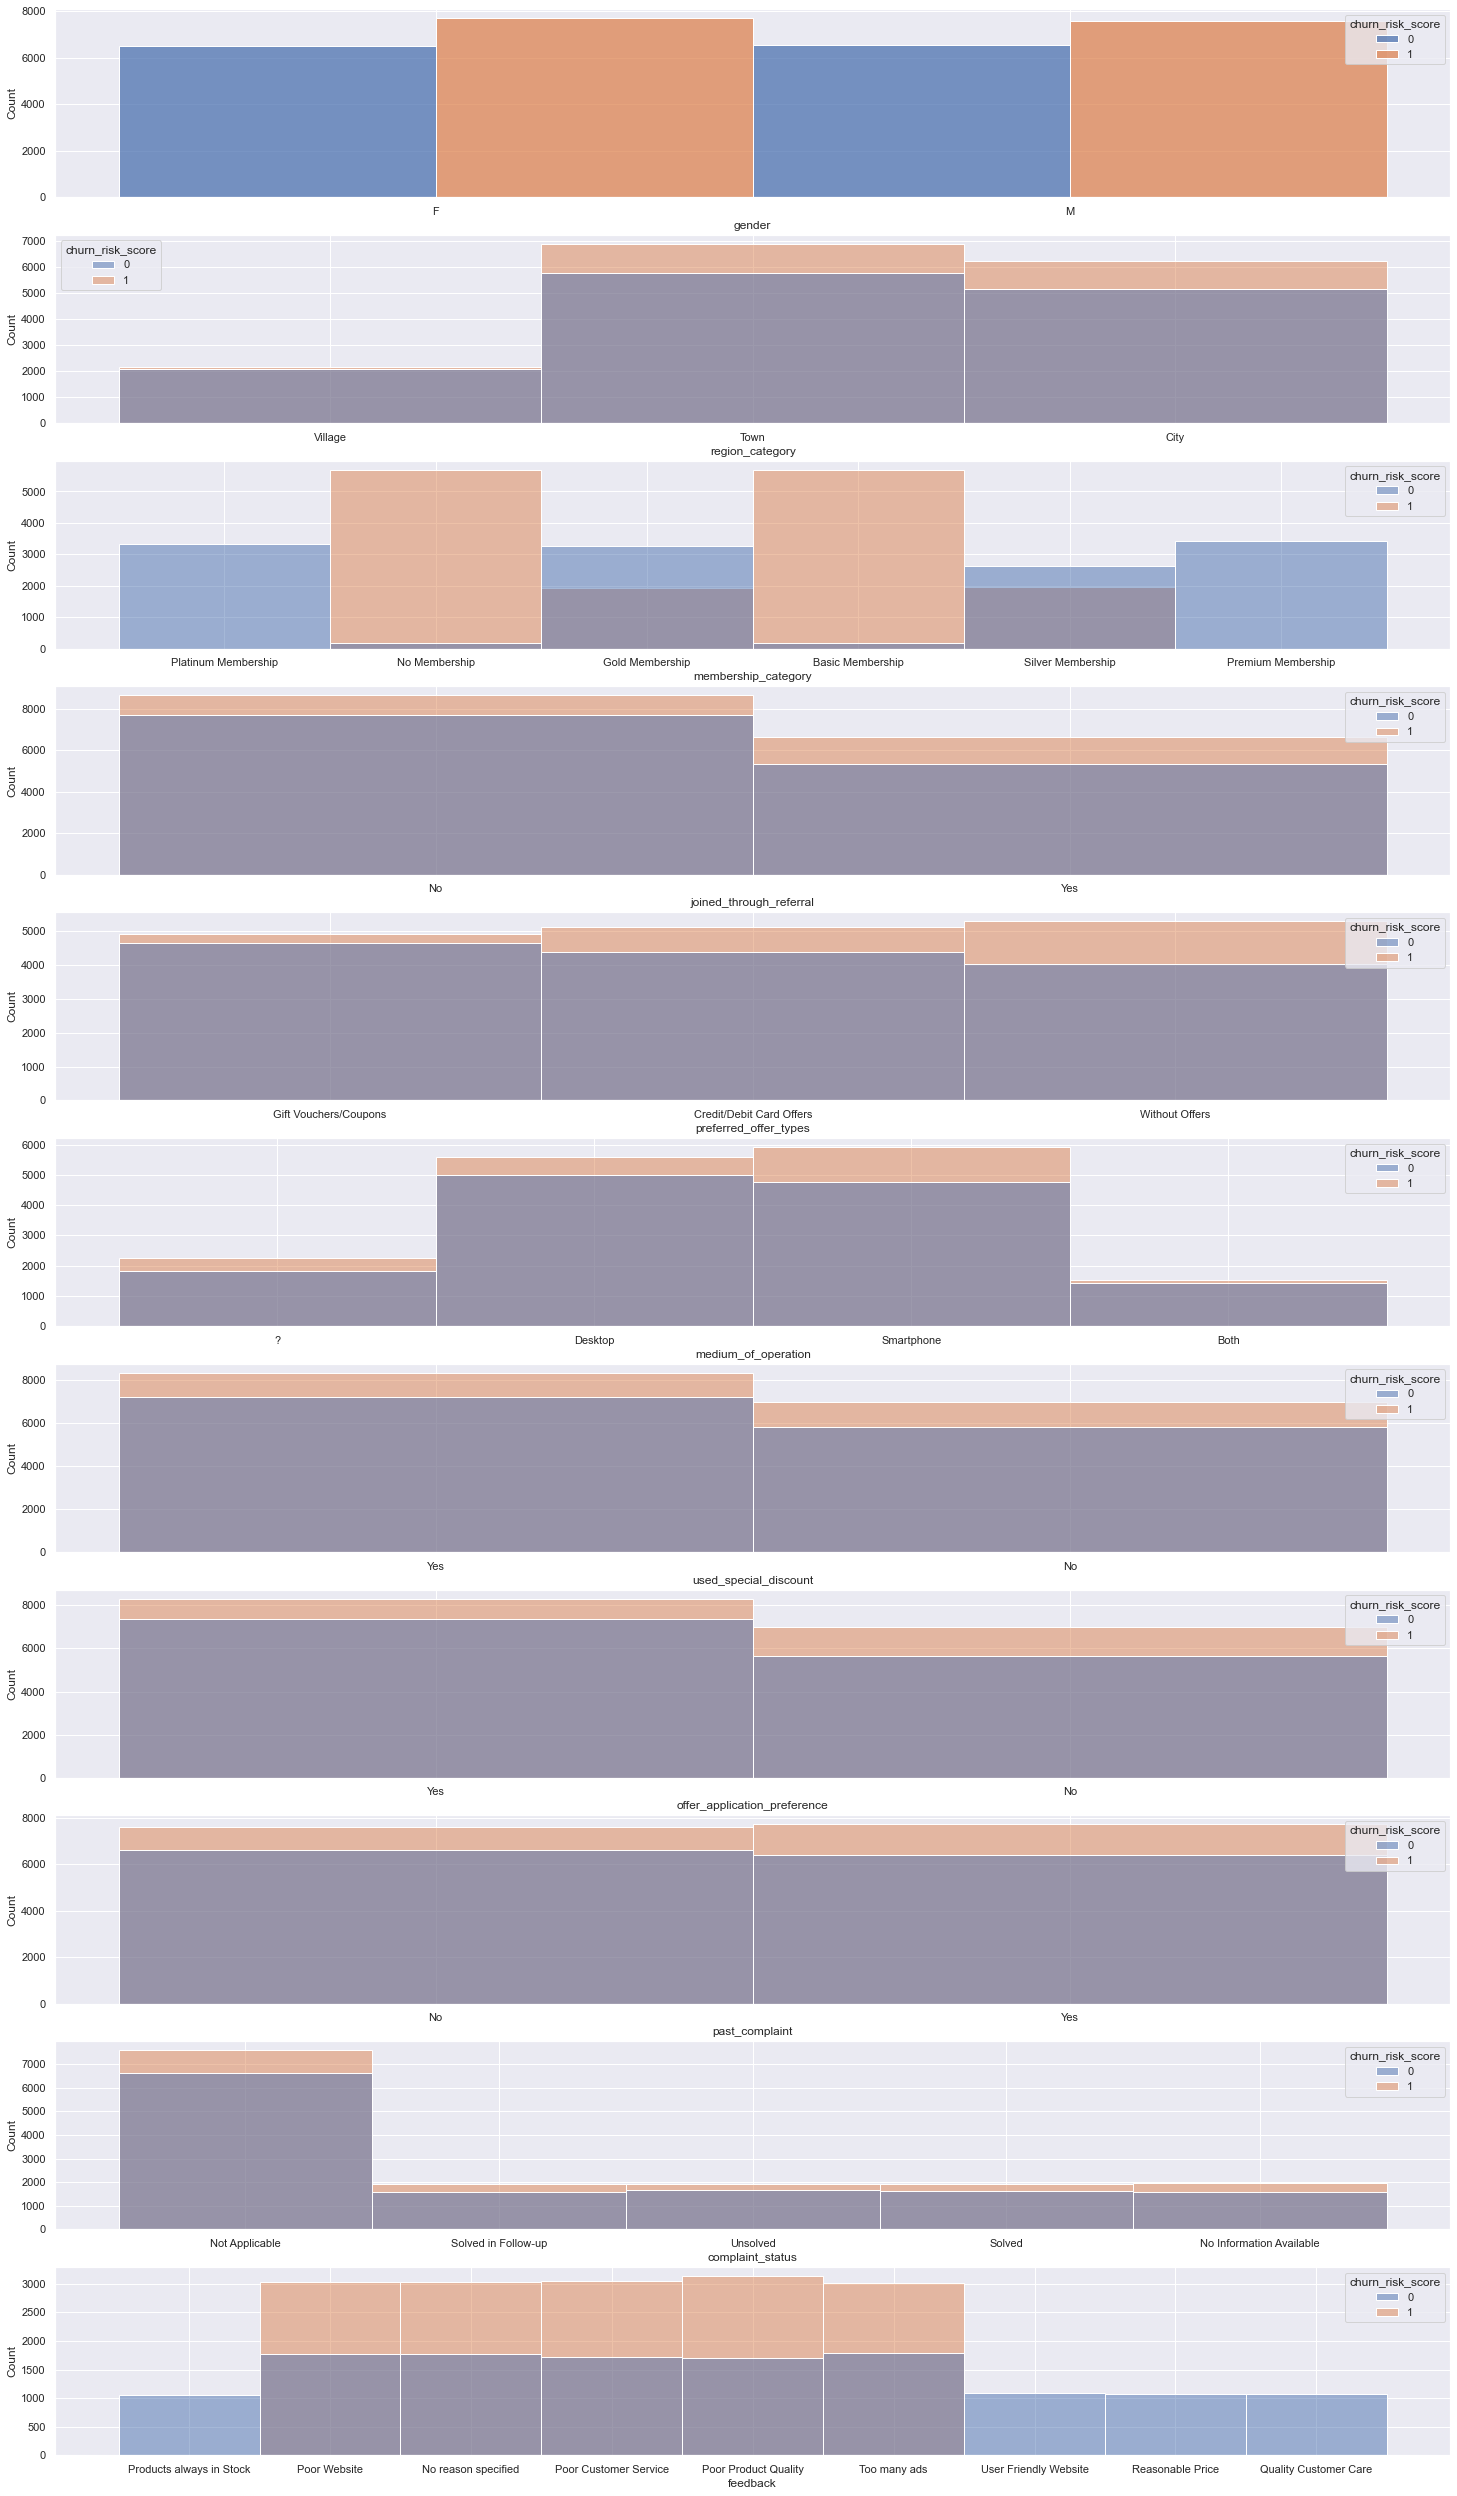

In [904]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

df_churn = df_churn.dropna(subset=['points_in_wallet'])


# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = df_churn

fig, axs = plt.subplots(11, 1, figsize=(25, 45))

sns.histplot(data=df, x="gender",color="red",hue="churn_risk_score",multiple="dodge", ax=axs[0])
sns.histplot(data=df, x="region_category",hue="churn_risk_score", color="teal", discrete=True ,ax=axs[1])
sns.histplot(data=df, x="membership_category", hue="churn_risk_score", color="teal", discrete=True,ax=axs[2])
sns.histplot(data=df, x="joined_through_referral", hue="churn_risk_score", color="teal", discrete=True,ax=axs[3])
sns.histplot(data=df, x="preferred_offer_types", hue="churn_risk_score", color="teal", discrete=True,ax=axs[4])
sns.histplot(data=df, x="medium_of_operation", hue="churn_risk_score", color="teal", discrete=True,ax=axs[5])
sns.histplot(data=df, x="used_special_discount", hue="churn_risk_score", color="teal", discrete=True,ax=axs[6])
sns.histplot(data=df, x="offer_application_preference", hue="churn_risk_score", color="teal", discrete=True,ax=axs[7])
sns.histplot(data=df, x="past_complaint", hue="churn_risk_score", color="teal", discrete=True,ax=axs[8])
sns.histplot(data=df, x="complaint_status", hue="churn_risk_score", color="teal", discrete=True,ax=axs[9])
sns.histplot(data=df, x="feedback", hue="churn_risk_score", color="teal", discrete=True,ax=axs[10])



plt.show()

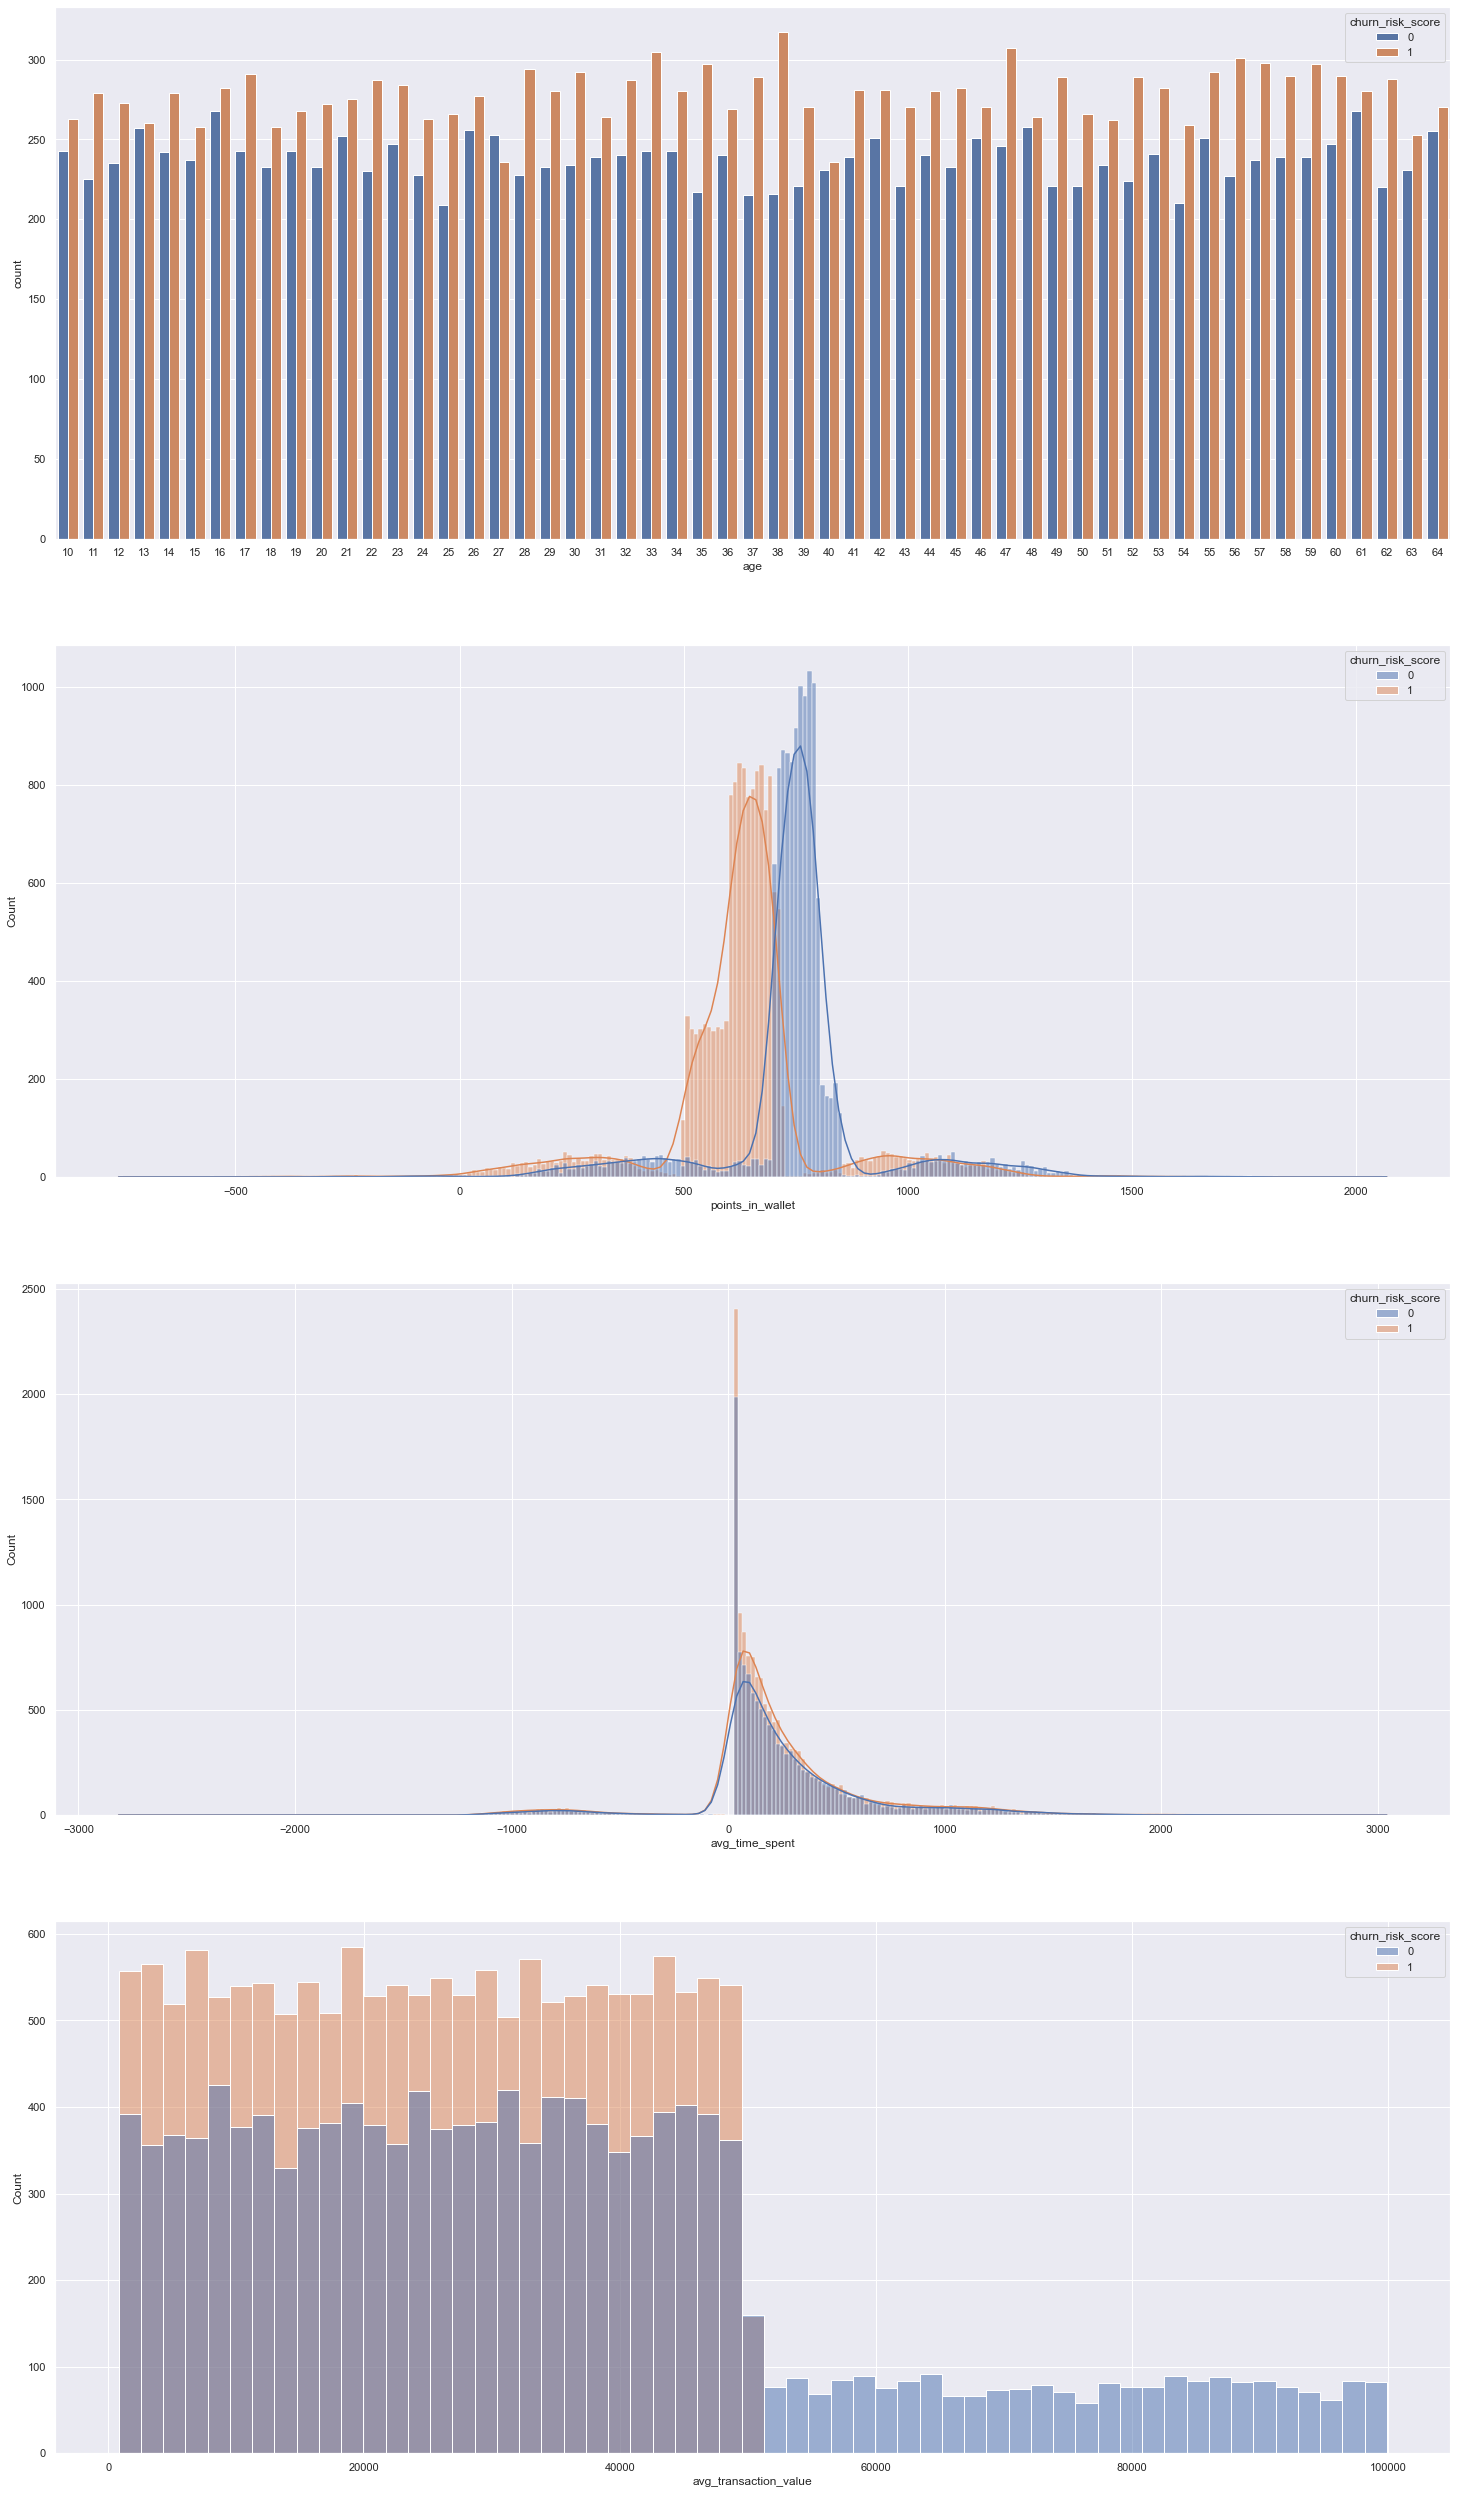

In [905]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = df_churn

fig, axs = plt.subplots(4, 1, figsize=(25, 45))

sns.countplot(data=df, x="age", hue="churn_risk_score", ax=axs[0])
sns.histplot(data=df, x="points_in_wallet", hue="churn_risk_score",kde=True, discrete=False,ax=axs[1])
sns.histplot(data=df, x="avg_time_spent", hue="churn_risk_score", kde=True, discrete=False,ax=axs[2])
sns.histplot(data=df, x="avg_transaction_value", hue="churn_risk_score", color="teal", discrete=False,ax=axs[3])


plt.show()

<font size="6"><div align="center"><span style="color:blue">Tratando dados</span></div></font>

In [906]:
df_churn['gender']=df_churn['gender'].map({'F':1,
                             'M':0},
                             na_action=None)

df_churn['joined_through_referral']=df_churn['joined_through_referral'].map({'Yes':1,
                             'No':0},
                             na_action=None)


df_churn['used_special_discount']=df_churn['used_special_discount'].map({'Yes':1,
                             'No':0},
                             na_action=None)

df_churn['offer_application_preference']=df_churn['offer_application_preference'].map({'Yes':1,
                             'No':0},
                             na_action=None)

df_churn['past_complaint']=df_churn['past_complaint'].map({'Yes':1,
                             'No':0},
                             na_action=None)

categoria_idade = pandas.cut(df_churn.age,bins=[0,17,25,35,40,60,200],
                                labels=['Criança','Adulto inicial',
                                        'Adulto pleno','Adulto final',
                                        'Meia-idade','Idoso'])
df_churn.insert(2,'age_group',categoria_idade)

df_churn['feedback']=df_churn['feedback'].map({'Products always in Stock':1,
                             'User Friendly Website':1,'Reasonable Price':1,'Quality Customer Care':1,
                             'Poor Product Quality':0,'Poor Website':0,'No reason specified':0,'Too many ads':0,
                             'Poor Customer Service':0},
                             na_action=None)

df_churn['membership_category']=df_churn['membership_category'].map({'Basic Membership':'Until basic',
                             'No Membership':'Until basic','Silver Membership':'Silve and Gold','Gold Membership':'Silve and Gold',
                             'Premium Membership':'Premium and Platium','Platinum Membership':'Premium and Platium'},
                             na_action=None)

In [907]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_churn.columns:
    df_churn['avg_transaction_value'] = absolute_maximum_scale(df_churn['avg_transaction_value'])
    df_churn['points_in_wallet'] = absolute_maximum_scale(df_churn['points_in_wallet'])
    df_churn['age'] = absolute_maximum_scale(df_churn['age'])
    df_churn['avg_time_spent'] = absolute_maximum_scale(df_churn['avg_time_spent'])

In [908]:
df_churn.dtypes

Unnamed: 0                         int64
age                              float64
age_group                       category
gender                             int64
security_no                       object
region_category                   object
membership_category               object
joining_date                      object
joined_through_referral            int64
referral_id                       object
preferred_offer_types             object
medium_of_operation               object
internet_option                   object
last_visit_time                   object
days_since_last_login              int64
avg_time_spent                   float64
avg_transaction_value            float64
avg_frequency_login_days          object
points_in_wallet                 float64
used_special_discount              int64
offer_application_preference       int64
past_complaint                     int64
complaint_status                  object
feedback                           int64
churn_risk_score

In [909]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

categorical_cols = ['membership_category']

for k in categorical_cols:
    if df_churn[k].dtypes == 'object':    
        df_ = df_churn[k].unique()
        p = []
    
        for i in df_:
            for j in df_churn[k]:
                if i == j:
                    p.append(1)
                else:
                    p.append(0)
            df_churn[k + " " + i] = p
            p=[]
    else:
        p = []

In [910]:
df_churn.head()

,Unnamed: 0,age,age_group,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,membership_category Premium and Platium,membership_category Until basic,membership_category Silve and Gold
0,0,0.281,Adulto inicial,1,XW0DQ7H,Village,Premium and Platium,2017-08-17,0,xxxxxxxx,...,0.378,1,1,0,Not Applicable,1,0,1,0,0
2,2,0.688,Meia-idade,1,1F2TCL3,Town,Until basic,2016-11-11,1,CID12313,...,0.242,0,1,1,Solved in Follow-up,0,1,0,1,0
3,3,0.578,Adulto final,0,VJGJ33N,City,Until basic,2016-10-29,1,CID3793,...,0.274,0,1,1,Unsolved,0,1,0,1,0
4,4,0.484,Adulto pleno,1,SVZXCWB,City,Until basic,2017-09-12,0,xxxxxxxx,...,0.320,0,1,1,Solved,0,1,0,1,0
5,5,0.203,Criança,0,PSG1LGF,City,Silve and Gold,2016-01-08,0,xxxxxxxx,...,0.349,1,0,1,Unsolved,0,0,0,0,1


In [911]:
#df_churn.dropna(subset = ['region_category'], inplace=True)
#df_churn.dropna(subset = ['joined_through_referral'], inplace=True)
#df_churn = df_churn.dropna()
count_nan_in_df = df_churn.isnull().sum()
print (count_nan_in_df)

Unnamed: 0                                 0
age                                        0
age_group                                  0
gender                                     0
security_no                                0
region_category                            0
membership_category                        0
joining_date                               0
joined_through_referral                    0
referral_id                                0
preferred_offer_types                      0
medium_of_operation                        0
internet_option                            0
last_visit_time                            0
days_since_last_login                      0
avg_time_spent                             0
avg_transaction_value                      0
avg_frequency_login_days                   0
points_in_wallet                           0
used_special_discount                      0
offer_application_preference               0
past_complaint                             0
complaint_

<font size="6"><div align="center"><span style="color:blue">Treinamento dos modelos</span></div></font>

In [912]:
df_churn=df_churn.drop(columns=['Unnamed: 0','age','gender','age_group','security_no','region_category','membership_category','complaint_status','joining_date','referral_id','avg_frequency_login_days','preferred_offer_types','used_special_discount','preferred_offer_types','medium_of_operation','internet_option','last_visit_time','days_since_last_login','complaint_status','past_complaint','avg_time_spent','offer_application_preference','avg_transaction_value','joined_through_referral'])
#df_churn=df_churn['points_in_wallet','feedback','membership_category Premium and Platium','membership_category Silve and Gold','membership_category Until basic']
#df_churn = pandas.DataFrame(df_churn['points_in_wallet'],df_churn['feedback'],df_churn['membership_category Premium and Platium'],df_churn['membership_category Silve and Gold'],df_churn['membership_category Until basic'],df_churn['churn_risk_score'])
#print(df_churn)


In [913]:
Y = df_churn[churn_target_col]
X = df_churn.drop(churn_target_col, axis=1)

# train/test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, Y, test_size=0.2)
cvfold = model_selection.StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)

df_train = xtrain.copy()
df_test = xtest.copy()
df_train['train_set'] = 1
df_test['train_set'] = 0
df_train[churn_target_col] = ytrain
df_test[churn_target_col] = ytest

# Pipeline
model_churn = pipeline.Pipeline([
#                                ('scaler', preprocessing.StandardScaler()),
                                 ('scaler', preprocessing.MinMaxScaler()),
                                ('model', lm.LogisticRegression(penalty='l2',
                                                                solver='liblinear'))
                               ]) 

model_churn.fit(xtrain, ytrain)      
df_train['decision_lr'] = model_churn.predict(xtrain)
df_test['decision_lr']  = model_churn.predict(xtest)
df_train['probability_lr'] = model_churn.predict_proba(xtrain)[:,1]
df_test['probability_lr']  = model_churn.predict_proba(xtest)[:,1]

df_churn_lr = pandas.concat((df_train, df_test), axis=0)


idx = df_churn_lr['train_set'] == 0

print('Logistic\t', metrics.accuracy_score(df_churn_lr[idx][churn_target_col],
                                           df_churn_lr[idx]['probability_lr']>0.5))

Logistic	 0.9198729262266149


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2615
           1       0.95      0.90      0.92      3051

    accuracy                           0.92      5666
   macro avg       0.92      0.92      0.92      5666
weighted avg       0.92      0.92      0.92      5666



[Text(0, 0.5, 'Não'), Text(0, 1.5, 'Sim')]

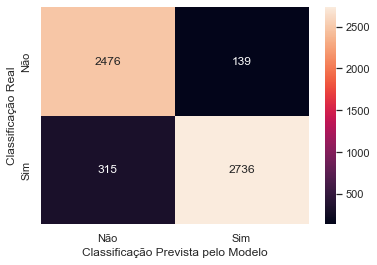

In [914]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
cm = metrics.confusion_matrix(df_test['churn_risk_score'],
                              df_test['decision_lr'])


print(classification_report(df_test['churn_risk_score']    # List of Actual Values
        , df_test['decision_lr']))


sns.heatmap(cm, annot=True, fmt = '.0f')

plt.xlabel('Classificação Prevista pelo Modelo')
plt.ylabel('Classificação Real')

plt.gca().set_xticklabels({"Não":0,"Sim":1})
plt.gca().set_yticklabels({"Não":0,"Sim":1})

<font size="6"><div align="center"><span style="color:blue">Regressão Logística</span></div></font>

<font size="4"><div align="Left"><span style="color:blue">Treinamento do modelo
</span></div></font>

In [915]:
def plot_coefs(model, class_label, target_label_map):
    fig = plt.figure(figsize=(15,4))
    
    iclass = 0
    if class_label != '':
        idx  = target_label_map.target_label==class_label
        iclass = target_label_map.loc[idx, 'target'].values[0]
    
    if len(model.coef_.shape) == 2:
        coefs = model.coef_[iclass]
    else:
        coefs = model.coef_
        
    coef_names = xtrain.columns

    idx = np.argsort(coefs)

    plt.bar(np.arange(coefs.shape[0]), coefs[idx])
    plt.xticks(np.arange(coefs.shape[0]), coef_names[idx], rotation='90')
    plt.title('Coeficientes do modelo ' + model.__class__.__name__ + ' ' + class_label)
    plt.grid()
    plt.xlim((-0.5, coefs.shape[0]-0.5))
    plt.show()
    
    
interact(plot_coefs, model = fixed(model_churn.steps[1][1]), 
         class_label = fixed(''),
         target_label_map = fixed(churn_label_map))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot_coefs(model, class_label, target_label_map)>

In [916]:


from statsmodels.discrete import discrete_model

logit = discrete_model.Logit(ytrain, xtrain).fit()

logit.summary2()

         Current function value: 0.249116
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Results: Logit
==================================================================================================
Model:                         Logit                       Pseudo R-squared:            0.639     
Dependent Variable:            churn_risk_score            AIC:                         11301.9366
Date:                          2022-06-05 18:53            BIC:                         11342.0793
No. Observations:              22664                       Log-Likelihood:              -5646.0   
Df Model:                      4                           LL-Null:                     -15636.   
Df Residuals:                  22659                       LLR p-value:                 0.0000    
Converged:                     0.0000                      Scale:                       1.0000    
No. Iterations:                35.0000                                                            
--------------------------------------------------------------------------------------------------
                                         Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------------------------------
points_in_wallet                         -4.7428     0.2846 -16.6635 0.0000     -5.3006    -4.1849
feedback                                -25.2103  8558.7980  -0.0029 0.9976 -16800.1462 16749.7256
membership_category Premium and Platium -26.7511 24897.2336  -0.0011 0.9991 -48824.4323 48770.9301
membership_category Until basic           4.9089     0.1132  43.3731 0.0000      4.6871     5.1307
membership_category Silve and Gold        1.5543     0.1005  15.4625 0.0000      1.3573     1.7513
==================================================================================================

"""

In [ ]:
from sklearn import svm
from sklearn.model_selection import validation_curve
grid_search_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel':['linear', 'rbf', 'poly'],
}


def plot_parameter_validation_curve(param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = xtrain, 
                                                 y = ytrain, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    
#     
model_churn = svm.SVC(kernel='linear', C=0.1, probability=True)
    
    
interact(plot_parameter_validation_curve,
         param_name = list(grid_search_lr.keys()), 
         grid_search = fixed(grid_search_lr),
         model = fixed(svm.SVC()),
         model_name = fixed('SVM'),
         scoring = classification_scores,
         logx = True
)

interactive(children=(Dropdown(description='param_name', options=('C', 'kernel'), value='C'), Dropdown(descrip…

In [ ]:
grid_search_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}


def plot_parameter_validation_curve(param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = xtrain, 
                                                 y = ytrain, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
interact(plot_parameter_validation_curve,
         param_name = list(grid_search_lr.keys()), 
         grid_search = fixed(grid_search_lr),
         model = fixed(lm.LogisticRegression(solver='liblinear')),
         model_name = fixed('Regressão Logística'),
         scoring = classification_scores,
         logx = True
)